<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Features-engineering---indicators" data-toc-modified-id="Features-engineering---indicators-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Features engineering - indicators</a></span></li><li><span><a href="#Clean/trim-the-data" data-toc-modified-id="Clean/trim-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clean/trim the data</a></span></li><li><span><a href="#Train-and-test-data" data-toc-modified-id="Train-and-test-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train and test data</a></span></li><li><span><a href="#Create-output-signals" data-toc-modified-id="Create-output-signals-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Create output signals</a></span></li><li><span><a href="#Create-features-and-target" data-toc-modified-id="Create-features-and-target-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Create features and target</a></span></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>

- **What?** SVM buy or sell strategy

# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!pip install TA-lib
#!conda install -c conda-forge ta-lib
import talib as ta

# Load data
<hr style="border:2px solid black"> </hr>

In [2]:
Df = pd.read_csv('../data/random_stock_data.csv')
Df.head(30)

,Time,Open,High,Low,Close,Volume
0,09:15:59,319.25,319.40,316.05,317.70,143354
1,09:16:59,317.70,318.20,317.70,318.00,52695
2,09:17:59,318.00,318.85,318.00,318.55,47179
3,09:18:59,318.65,319.40,318.50,319.20,44745
4,09:19:59,319.30,319.85,319.20,319.65,57892
5,09:20:59,319.60,320.40,319.60,320.25,67482
6,09:21:59,320.25,320.30,319.95,320.05,56590
7,09:22:59,320.15,320.15,319.60,319.60,52413
8,09:23:59,319.65,319.65,319.15,319.40,56305
9,09:24:59,319.50,320.05,319.45,319.70,36525


# EDA
<hr style="border:2px solid black"> </hr>

In [3]:
# Drop the rows with 0 volume traded
Df = Df.drop(Df[Df['Volume']==0].index)

In [4]:
# Convert the 'Time' column into pandas datetime format
Df['Time'] = pd.to_datetime(Df['Time'])

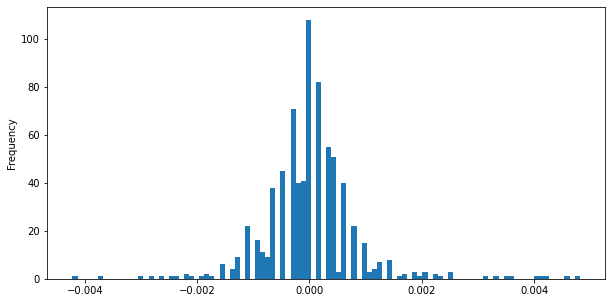

In [5]:
Df['Close'].pct_change().plot(kind='hist', bins=100, figsize=(10, 5));

# Features engineering - indicators
<hr style="border:2px solid black"> </hr>

- **Relative Strength Index (RSI)** The RSI provides technical traders with signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset’s price.
- **Simple Moving Average (SMA)** s an arithmetic moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average. 
- **The parabolic SAR (stop and reversal)** is a technical indicator used to determine the price direction of an asset, as well as draw attention to when the price direction is changing. Sometimes known as the "stop and reversal system". 
- **Average Directional Index (ADX)**  makes use of a positive (+DI) and negative (-DI) directional indicator in addition to the trendline. The trend has strength when ADX is above 25; the trend is weak or the price is trendless when ADX is below 20, 


In [6]:
# Create a variable n with a value of 10 = 10 Minutes
n = 10

In [7]:
# Create a column by name, RSI and assign the calculation of RSI to it
Df['RSI'] = ta.RSI(np.array(Df['Close'].shift(1)), timeperiod=n)

In [8]:
# Create a column by name, SMA and assign the SMA calculation to it
Df['SMA']= Df['Close'].shift(1).rolling(window=n).mean()

# Create a column by name, Corr and assign the calculation of correlation to it
Df['Corr']= Df['Close'].shift(1).rolling(window=n).corr(Df['SMA'].shift(1))

In [9]:
# Create a column by name, SAR and assign the SAR calculation to it
Df['SAR']=ta.SAR(np.array(Df['High'].shift(1)),np.array(Df['Low'].shift(1)),\
                  0.2,0.2)

# Create a column by name, ADX and assign the ADX calculation to it
Df['ADX']=ta.ADX(np.array(Df['High'].shift(1)),np.array(Df['Low'].shift(1)),\
                  np.array(Df['Open']), timeperiod =n)

We will pass yesterday's "High", "Low", and "Open" prices as input to the algorithm in variables named in lower cases. This will help the algorithm sense the volatility of the past time period.

In [10]:
# Create columns 'high', 'low' and 'close' with previous day's OHLC data
Df['high'] = Df['High'].shift(1)
Df['low'] = Df['Low'].shift(1)
Df['close'] = Df['Close'].shift(1)

We will also create two more columns as features: the change in "Open" prices between yesterday and today & the difference between today's "Open" and yesterday's "Close" prices.

In [11]:
# Create columns 'OO' with the difference between today's open and previous day's open 
Df['OO'] = Df['Open']-Df['Open'].shift(1)

# Create columns 'OC' with the difference between today's open and previous day's close 
Df['OC'] = Df['Open']-Df['close']

In [12]:
# Create a column 'Ret' with calculation of returns
Df['Ret'] = (Df['Open'].shift(-1)-Df['Open'])/Df['Open']

# Create n columns and assign   
for i in range(1,n):
    Df['return%i'%i] = Df['Ret'].shift(i)

# Clean/trim the data
<hr style="border:2px solid black"> </hr>

You need to keep the values of indicator 'Corr' between -1 and 1, as the correlation coefficient is always between these values. This is done by changing all values less than -1 to -1, and all values greater than 1 to 1.

This doesn't affect our calculations negatively because the extreme values are realised due to NAN values in the data, which need to be handled before training the algorithm. Then we drop all NANs from the entire dataframe.

In [13]:
# Change the value of 'Corr' to -1 if it is less than -1
Df.loc[Df['Corr']<-1,'Corr'] = -1

# Change the value of 'Corr' to 1 if it is greater than 1
Df.loc[Df['Corr']>1,'Corr'] = 1

# Drop the NAN values
Df=Df.dropna()

In [14]:
Df

,Time,Open,High,Low,Close,Volume,RSI,SMA,Corr,SAR,...,Ret,return1,return2,return3,return4,return5,return6,return7,return8,return9
20,2023-06-28 09:35:59,317.90,318.20,317.60,317.80,29910,43.095793,318.850,0.816229,319.184400,...,-0.000315,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157,-0.001252,-0.000782,0.002037,0.002199
21,2023-06-28 09:36:59,317.80,317.85,317.40,317.40,21161,41.910041,318.795,0.871812,318.917520,...,-0.001259,-0.000315,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157,-0.001252,-0.000782,0.002037
22,2023-06-28 09:37:59,317.40,318.15,317.25,318.00,20039,37.343463,318.630,0.919286,318.654016,...,0.002048,-0.001259,-0.000315,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157,-0.001252,-0.000782
23,2023-06-28 09:38:59,318.05,318.65,317.85,318.65,20345,46.973248,318.465,0.892114,318.403213,...,0.001886,0.002048,-0.001259,-0.000315,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157,-0.001252
24,2023-06-28 09:39:59,318.65,319.00,318.10,318.25,86988,55.251655,318.380,0.616495,317.250000,...,-0.001412,0.001886,0.002048,-0.001259,-0.000315,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2023-06-28 15:24:59,321.85,321.95,321.70,321.80,57039,71.715070,321.415,0.207479,321.330000,...,-0.000155,0.000466,0.000622,0.000000,-0.000466,0.000155,0.001245,0.000000,0.000311,0.000156
745,2023-06-28 15:25:59,321.80,321.95,321.75,321.80,38601,68.057161,321.495,0.619122,321.454000,...,0.000155,-0.000155,0.000466,0.000622,0.000000,-0.000466,0.000155,0.001245,0.000000,0.000311
746,2023-06-28 15:26:59,321.85,321.85,321.45,321.55,61275,68.057161,321.560,0.717711,321.553200,...,-0.000777,0.000155,-0.000155,0.000466,0.000622,0.000000,-0.000466,0.000155,0.001245,0.000000
747,2023-06-28 15:27:59,321.60,321.75,321.35,321.45,65368,51.760292,321.595,0.500653,321.950000,...,-0.000466,-0.000777,0.000155,-0.000155,0.000466,0.000622,0.000000,-0.000466,0.000155,0.001245


# Train and test data
<hr style="border:2px solid black"> </hr>

We will be using 80% of the data to train and the rest 20% to test. To do this, you will create a split parameter which will divide the dataframe in an 80-20 ratio.

This can be changed as per your choice, but it is advisable to give at least 70% data as train data for good results. "split" is the integer index value for the row corresponding to test-train split. 

In [15]:
# Create a variable split which is 80% of the length of the Dataframe 
t = .8
split = int(t*len(Df))
split

583

# Create output signals
<hr style="border:2px solid black"> </hr>

Next, assign signal values corresponding to 'returns' that were calculated earlier. To do this, you will split the data into three equal parts, using the split on 'Ret' column. 
1. Highest returns’ quantile is assigned Signal '1' or "Buy".
2. Middle quantile is assigned Signal '0' or 'Do nothing'.
3. Lowest quantile is assigned Signal '-1' or 'Sell'. 

In [16]:
# Create a column by name, 'Signal' and initialize with 0
Df['Signal']=0

# Assign a value of 1 to 'Signal' column for the quantile with highest returns
Df.loc[Df['Ret']>Df['Ret'][:split].quantile(q=0.66),'Signal']=1

# Assign a value of -1 to 'Signal' column for the quantile with lowest returns
Df.loc[Df['Ret']<Df['Ret'][:split].quantile(q=0.34),'Signal']=-1

In [17]:
# Assign a value of 0 to 'Signal' column at 1529 time
Df.loc[(Df['Time'].dt.hour==15) & (Df['Time'].dt.minute==29), 'Signal']=0        

# Assign a value of 0 to 'Ret' column at 1529 time
Df.loc[(Df['Time'].dt.hour==15) & (Df['Time'].dt.minute==29), 'Ret']=0

# Create features and target
<hr style="border:2px solid black"> </hr>

Drop the columns 'Close', 'Signal', 'Time', 'High', 'Low', 'Volume', and 'Ret' since the algorithm will not be trained on these features. Next, we assign 'Signal' to 'y' which is the output variable that you will predict using test data.   

In [18]:
# Use df.drop() to drop the columns
X = Df.drop(['Close', 'Signal', 'Time', 'High', 'Low', 'Volume', 'Ret'],axis=1)

# Create a variable which contains all the 'Signal' values
y = Df['Signal']

In [19]:
# Plot them together
pd.concat([X,y], axis=1)

,Open,RSI,SMA,Corr,SAR,ADX,high,low,close,OO,...,return1,return2,return3,return4,return5,return6,return7,return8,return9,Signal
20,317.90,43.095793,318.850,0.816229,319.184400,13.793519,318.30,317.85,317.90,-0.35,...,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157,-0.001252,-0.000782,0.002037,0.002199,-1
21,317.80,41.910041,318.795,0.871812,318.917520,15.563131,318.20,317.60,317.80,-0.10,...,-0.000315,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157,-0.001252,-0.000782,0.002037,-1
22,317.40,37.343463,318.630,0.919286,318.654016,17.581703,317.85,317.40,317.40,-0.40,...,-0.001259,-0.000315,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157,-0.001252,-0.000782,1
23,318.05,46.973248,318.465,0.892114,318.403213,18.123915,318.15,317.25,318.00,0.65,...,0.002048,-0.001259,-0.000315,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157,-0.001252,1
24,318.65,55.251655,318.380,0.616495,317.250000,16.790058,318.65,317.85,318.65,0.60,...,0.001886,0.002048,-0.001259,-0.000315,-0.001100,-0.001882,-0.000314,-0.000157,-0.000157,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,321.85,71.715070,321.415,0.207479,321.330000,22.193076,321.95,321.70,321.85,0.15,...,0.000466,0.000622,0.000000,-0.000466,0.000155,0.001245,0.000000,0.000311,0.000156,0
745,321.80,68.057161,321.495,0.619122,321.454000,22.674351,321.95,321.70,321.80,-0.05,...,-0.000155,0.000466,0.000622,0.000000,-0.000466,0.000155,0.001245,0.000000,0.000311,0
746,321.85,68.057161,321.560,0.717711,321.553200,23.107498,321.95,321.75,321.80,0.05,...,0.000155,-0.000155,0.000466,0.000622,0.000000,-0.000466,0.000155,0.001245,0.000000,-1
747,321.60,51.760292,321.595,0.500653,321.950000,21.483583,321.85,321.45,321.55,-0.25,...,-0.000777,0.000155,-0.000155,0.000466,0.000622,0.000000,-0.000466,0.000155,0.001245,-1


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>
    
- https://github.com/Datatouille/findalpha/tree/master
- [Coding the Relative Strength (RSI) Index in Python](https://www.qmr.ai/relative-strength-index-rsi-in-python/)


</font>
</div>